# Data Mart Sample Query

Test
* get semantic groups for all snomed concept id
* count number of tags in each semantic group

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect("../database.sqlite")
cursor = conn.cursor()

query = ''' 
    SELECT a.concept_id, c.name, c.semantic_type, sg.group_abbr
    FROM Annotations AS a
    INNER JOIN Concepts AS c
    ON a.concept_id = c.concept_id
    INNER JOIN Semantic_Groups AS sg
    ON c.semantic_type = sg.semantic_type
'''

cursor.execute(query)
# Fetch all results
rows = cursor.fetchall()

# Get column names from cursor.description
columns = [description[0] for description in cursor.description]

# Convert to DataFrame
df = pd.DataFrame(rows, columns=columns)

In [4]:
df

,concept_id,name,semantic_type,group_abbr
0,91936005,Allergy to penicillin,Disease or Syndrome,DISO
1,91936005,Allergy to penicillin,Disease or Syndrome,DISO
2,91936005,Allergy to penicillin,Disease or Syndrome,DISO
3,91936005,Allergy to penicillin,Disease or Syndrome,DISO
4,91936005,Allergy to penicillin,Disease or Syndrome,DISO
...,...,...,...,...
51460,91489000,Acute vascular insufficiency of intestine (dis...,Disease or Syndrome,DISO
51461,312577008,Structure of blood vessel of intestine,"Body Part, Organ, or Organ Component",ANAT
51462,1144523008,Normal activity tolerance,Finding,DISO
51463,282584005,Does skip,Finding,DISO


In [9]:
query = ''' 
    SELECT sg.group_name, sg.group_abbr, COUNT(*) as cnt
    FROM Annotations AS a
    INNER JOIN Concepts AS c
    ON a.concept_id = c.concept_id
    INNER JOIN Semantic_Groups AS sg
    ON c.semantic_type = sg.semantic_type
    GROUP BY sg.group_abbr
    ORDER BY cnt DESC, sg.group_name
'''

cursor.execute(query)
# Fetch all results
rows = cursor.fetchall()

# Get column names from cursor.description
columns = [description[0] for description in cursor.description]

# Convert to DataFrame
df = pd.DataFrame(rows, columns=columns)

In [10]:
df

,group_name,group_abbr,cnt
0,Disorders,DISO,28052
1,Procedures,PROC,17790
2,Anatomy,ANAT,4508
3,Physiology,PHYS,471
4,Concepts & Ideas,CONC,372
5,Phenomena,PHEN,141
6,Activities & Behaviors,ACTI,86
7,Objects,OBJC,21
8,Chemicals & Drugs,CHEM,13
9,Living Beings,LIVB,9


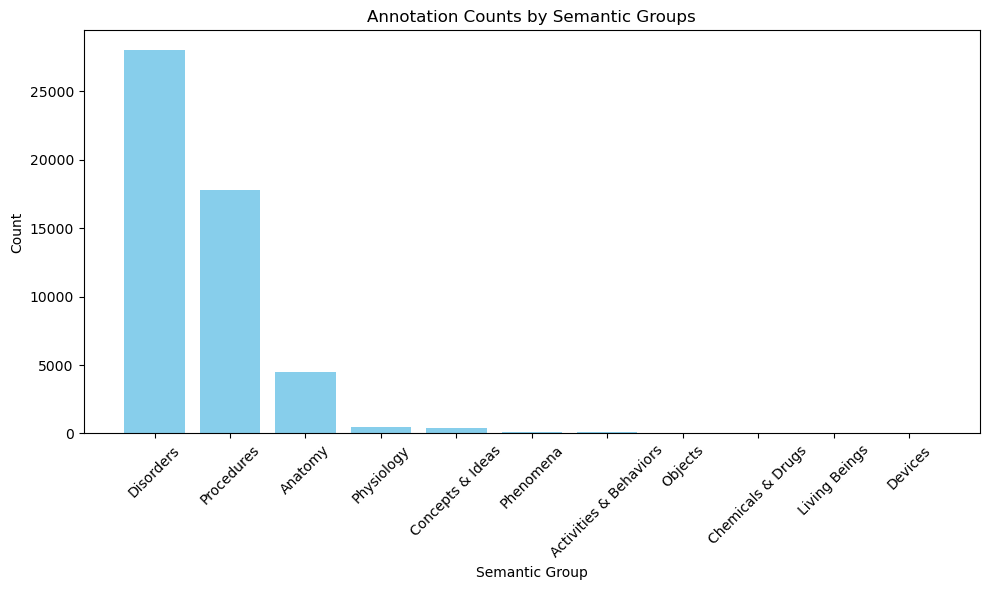

In [14]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(df["group_name"], df["cnt"], color='skyblue')
plt.title("Annotation Counts by Semantic Groups")
plt.xlabel("Semantic Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Save as image (optional)
plt.savefig("../figures/semantic_groups.png", dpi=300)
plt.show()
